<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_2_4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.4_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,83.725392,59.434673,-0.003852,153.156214,153.158240,-0.002026
1,0.0,1.0,92.916034,47.307491,-0.003887,150.219637,150.220684,-0.001047
2,0.0,2.0,87.741171,97.153024,-0.000016,194.894179,194.895286,-0.001108
3,0.0,3.0,69.318262,60.387768,-0.011699,139.694330,139.704383,-0.010053
4,0.0,4.0,50.631213,61.008597,-0.010745,121.629066,121.638350,-0.009284
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,84.349197,85.592821,0.004361,179.946379,179.943456,0.002923
249996,999.0,246.0,79.272827,26.719444,-0.004555,115.987715,115.992580,-0.004865
249997,999.0,247.0,68.536544,94.370694,0.000040,172.907278,172.908010,-0.000731
249998,999.0,248.0,69.314596,39.093542,-0.010510,118.397627,118.408129,-0.010501


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    83.725392  59.434673 -0.003852  153.156214  153.158240 -0.002026
      1.0    92.916034  47.307491 -0.003887  150.219637  150.220684 -0.001047
      2.0    87.741171  97.153024 -0.000016  194.894179  194.895286 -0.001108
      3.0    69.318262  60.387768 -0.011699  139.694330  139.704383 -0.010053
      4.0    50.631213  61.008597 -0.010745  121.629066  121.638350 -0.009284
...                ...        ...       ...         ...         ...       ...
999.0 245.0  84.349197  85.592821  0.004361  179.946379  179.943456  0.002923
      246.0  79.272827  26.719444 -0.004555  115.987715  115.992580 -0.004865
      247.0  68.536544  94.370694  0.000040  172.907278  172.908010 -0.000731
      248.0  69.314596  39.093542 -0.010510  118.397627  118.408129 -0.010501
      249.0  45.773058  38.457651 -0.004126   94.226583   94.229505 -0.002922

[250000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    83.725392  59.434673 -0.003852  153.156214  153.158240 -0.002026
      1.0    92.916034  47.307491 -0.003887  150.219637  150.220684 -0.001047
      2.0    87.741171  97.153024 -0.000016  194.894179  194.895286 -0.001108
      3.0    69.318262  60.387768 -0.011699  139.694330  139.704383 -0.010053
      4.0    50.631213  61.008597 -0.010745  121.629066  121.638350 -0.009284
...                ...        ...       ...         ...         ...       ...
999.0 245.0  84.349197  85.592821  0.004361  179.946379  179.943456  0.002923
      246.0  79.272827  26.719444 -0.004555  115.987715  115.992580 -0.004865
      247.0  68.536544  94.370694  0.000040  172.907278  172.908010 -0.000731
      248.0  69.314596  39.093542 -0.010510  118.397627  118.408129 -0.010501
      249.0  45.773058  38.457651 -0.004126   94.226583   94.229505 -0.002922

[250000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,83.725392,59.434673,-0.003852,153.156214,153.158240,-0.002026
1,0.0,1.0,92.916034,47.307491,-0.003887,150.219637,150.220684,-0.001047
2,0.0,2.0,87.741171,97.153024,-0.000016,194.894179,194.895286,-0.001108
3,0.0,3.0,69.318262,60.387768,-0.011699,139.694330,139.704383,-0.010053
4,0.0,4.0,50.631213,61.008597,-0.010745,121.629066,121.638350,-0.009284
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,84.349197,85.592821,0.004361,179.946379,179.943456,0.002923
249996,999.0,246.0,79.272827,26.719444,-0.004555,115.987715,115.992580,-0.004865
249997,999.0,247.0,68.536544,94.370694,0.000040,172.907278,172.908010,-0.000731
249998,999.0,248.0,69.314596,39.093542,-0.010510,118.397627,118.408129,-0.010501


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    83.725392  59.434673 -0.003852  153.156214  153.158240 -0.002026
      1.0    92.916034  47.307491 -0.003887  150.219637  150.220684 -0.001047
      2.0    87.741171  97.153024 -0.000016  194.894179  194.895286 -0.001108
      3.0    69.318262  60.387768 -0.011699  139.694330  139.704383 -0.010053
      4.0    50.631213  61.008597 -0.010745  121.629066  121.638350 -0.009284
...                ...        ...       ...         ...         ...       ...
999.0 245.0  84.349197  85.592821  0.004361  179.946379  179.943456  0.002923
      246.0  79.272827  26.719444 -0.004555  115.987715  115.992580 -0.004865
      247.0  68.536544  94.370694  0.000040  172.907278  172.908010 -0.000731
      248.0  69.314596  39.093542 -0.010510  118.397627  118.408129 -0.010501
      249.0  45.773058  38.457651 -0.004126   94.226583   94.229505 -0.002922

[250000 rows x 6 columns]

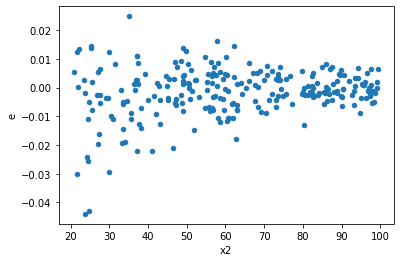

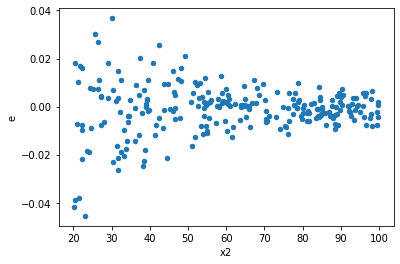

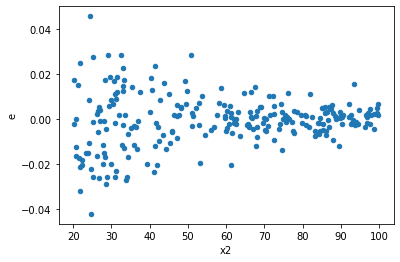

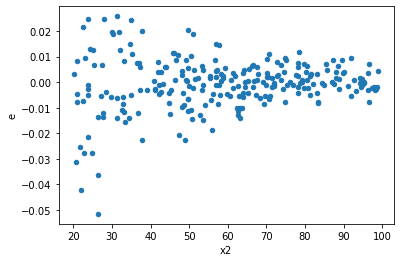

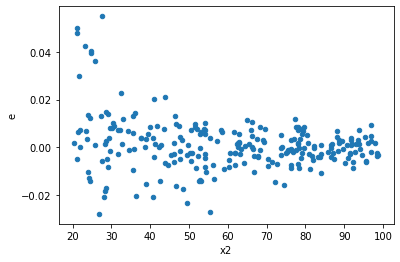

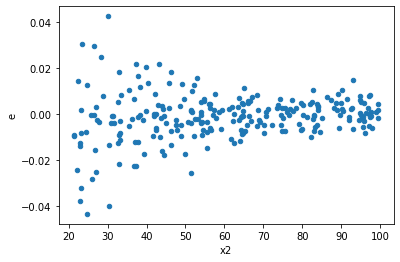

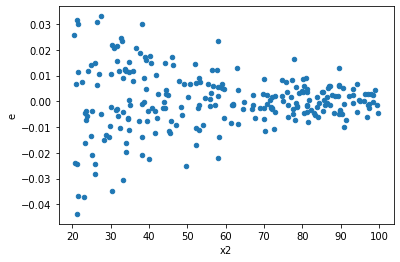

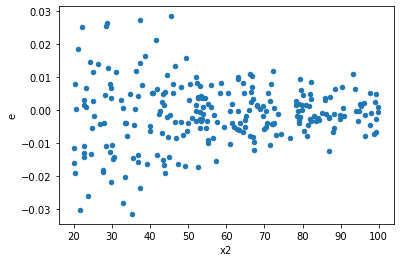

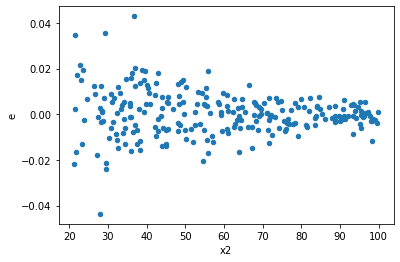

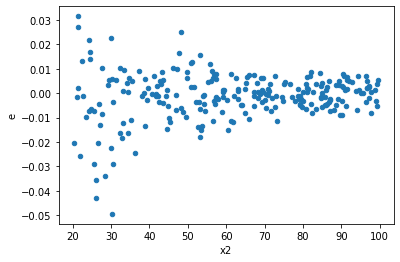

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,98.0,148.0,0.0034571527730166496,0.022503446578946856,3.5277069112414794e-05,0.0001520503147226139,4.310174244863895,1.5543122344752192e-15,0.9999999999999992,7.771561172376096e-16,Reject005=0 : Heteroscedasticity
2.0,132.0,114.0,0.010435310072225493,0.021186643731186502,7.905537933504162e-05,0.00018584775202795176,2.3508552307404336,4.2514958435990735e-06,0.9999978742520782,2.1257479217995368e-06,Reject005=0 : Heteroscedasticity
4.0,109.0,137.0,0.00342991787469792,0.024568746214771123,3.146713646511853e-05,0.00017933391397643156,5.699085907458533,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
6.0,127.0,119.0,0.00571878594608366,0.0278859768183388,4.5029810599083935e-05,0.00023433593964990588,5.204017883536759,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
8.0,126.0,120.0,0.005862797332646344,0.01624525891007097,4.653013756068527e-05,0.00013537715758392472,2.909451050028896,8.832212738951739e-09,0.9999999955838936,4.4161063694758695e-09,Reject005=0 : Heteroscedasticity
9.0,149.0,97.0,0.008025218699734086,0.01440509461333558,5.38605281861348e-05,0.00014850613003438744,2.757234936894233,2.0992263616292917e-07,0.9999998950386819,1.0496131808146458e-07,Reject005=0 : Heteroscedasticity
10.0,125.0,121.0,0.005366523772413923,0.018966378116407015,4.293219017931139e-05,0.00015674692658187615,3.65103494434372,4.716671497817515e-12,0.9999999999976417,2.3583357489087575e-12,Reject005=0 : Heteroscedasticity
11.0,127.0,119.0,0.007068627305432298,0.020064524816911473,5.565848271993935e-05,0.00016860945224295355,3.029357682841579,2.7051372253339423e-09,0.9999999986474314,1.3525686126669711e-09,Reject005=0 : Heteroscedasticity
12.0,128.0,118.0,0.007947772041722503,0.02557647304459906,6.209196907595705e-05,0.00021674977156439882,3.4907859227213267,2.8955726705248708e-11,0.9999999999855221,1.4477863352624354e-11,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,138.0,108.0,0.014381199091692495,0.003390331026467475,0.0001042115876209601,3.139195394877291e-05,0.3012328539025063,5.187638808441494e-11,Reject005=0 : Heteroscedasticity
1.0,98.0,148.0,0.0034571527730166496,0.022503446578946856,3.5277069112414794e-05,0.0001520503147226139,4.310174244863895,1.5543122344752192e-15,Reject005=0 : Heteroscedasticity
2.0,132.0,114.0,0.010435310072225493,0.021186643731186502,7.905537933504162e-05,0.00018584775202795176,2.3508552307404336,4.2514958435990735e-06,Reject005=0 : Heteroscedasticity
3.0,125.0,121.0,0.020855009675926742,0.004715221043973306,0.00016684007740741394,3.896876895845707e-05,0.23356959289402368,8.611200463821664e-15,Reject005=0 : Heteroscedasticity
4.0,109.0,137.0,0.00342991787469792,0.024568746214771123,3.146713646511853e-05,0.00017933391397643156,5.699085907458533,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
5.0,124.0,122.0,0.020678181059088266,0.004383672562975874,0.00016675952467006666,3.593174231947438e-05,0.2154704050072417,3.9214554899447183e-16,Reject005=0 : Heteroscedasticity
6.0,127.0,119.0,0.00571878594608366,0.0278859768183388,4.5029810599083935e-05,0.00023433593964990588,5.204017883536759,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
7.0,119.0,127.0,0.01663200344473229,0.005551167190014066,0.0001397647348296831,4.3709977874126506e-05,0.3127396759088862,4.878107726373704e-10,Reject005=0 : Heteroscedasticity
8.0,126.0,120.0,0.005862797332646344,0.01624525891007097,4.653013756068527e-05,0.00013537715758392472,2.909451050028896,8.832212738951739e-09,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    998
Reject005=1 : Homoscedasticity        2
Name: Result_test, dtype: int64